In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification, make_regression

In [27]:
def make_random_data(n_rows, n_columns, problem_type):
    if problem_type == "classification":
        x, y = make_classification(n_samples=n_rows, n_features=n_columns, n_classes=2, random_state=21)
    elif problem_type == "regression":
        x, y = make_regression(n_samples=n_rows, n_features=n_columns)
    
    feature_names = [f"x_{i}" for i in range(x.shape[1])]
    feature_names.append("target")
    
    return pd.DataFrame(np.concatenate((x, y.reshape(-1,1)), axis=1), columns=feature_names)

data_classification = make_random_data(n_rows=100, n_columns=10, problem_type="classification")
data_regression = make_random_data(n_rows=100, n_columns=10, problem_type="regression")
data_classification

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,target
0,-0.304180,0.499770,0.767214,-0.930986,1.131726,0.279222,0.320357,-0.498250,0.740040,1.103170,1.0
1,0.159726,1.360251,1.008300,-1.573324,0.418751,-0.192549,0.246566,0.236686,0.171186,1.893630,1.0
2,1.984758,0.987433,0.040461,1.422739,1.801034,-0.061408,-0.035999,-1.800050,-1.055891,0.664531,1.0
3,0.189401,0.264090,0.309313,1.347407,0.078989,0.551918,0.969437,-0.631017,0.227037,0.484254,1.0
4,0.074976,-1.781137,-0.468241,-2.286583,0.243487,0.563804,-0.681992,-0.518173,1.230037,-1.604579,0.0
...,...,...,...,...,...,...,...,...,...,...,...
95,-0.449590,0.373126,-0.475810,-0.669493,-0.174018,0.143911,0.677231,0.428601,-1.237158,-0.253206,1.0
96,0.832561,-0.855009,-0.885864,-0.076494,1.010914,0.075434,-0.748524,1.012445,-0.537829,-1.449137,0.0
97,-1.027553,1.100880,0.248761,0.842681,-1.712240,2.903226,0.398865,0.260149,-0.829631,0.950012,1.0
98,0.471626,-1.777680,-1.090644,0.650902,-0.988585,-0.150612,-0.213366,-0.694024,0.163840,-2.241550,0.0


In [3]:
data_classification.var()

x_0       1.317052
x_1       1.433999
x_2       0.813250
x_3       1.137152
x_4       0.870081
x_5       0.774427
x_6       0.870288
x_7       1.048479
x_8       1.397943
x_9       2.372108
target    0.252525
dtype: float64

In [28]:
# Remove features that have low variance ie. they are almost constant
from sklearn.feature_selection import VarianceThreshold

target = data_classification["target"]

var_thres = VarianceThreshold(threshold=1.0)
transformed_data = var_thres.fit_transform(data_classification.drop(columns=["target"]))

columns_kept = data_classification.drop(columns=["target"]).loc[:,var_thres.get_support()].columns
transformed_df = pd.DataFrame(transformed_data, columns=columns_kept)
pd.concat([transformed_df, target], axis=1)

,x_0,x_1,x_3,x_7,x_8,x_9,target
0,-0.304180,0.499770,-0.930986,-0.498250,0.740040,1.103170,1.0
1,0.159726,1.360251,-1.573324,0.236686,0.171186,1.893630,1.0
2,1.984758,0.987433,1.422739,-1.800050,-1.055891,0.664531,1.0
3,0.189401,0.264090,1.347407,-0.631017,0.227037,0.484254,1.0
4,0.074976,-1.781137,-2.286583,-0.518173,1.230037,-1.604579,0.0
...,...,...,...,...,...,...,...
95,-0.449590,0.373126,-0.669493,0.428601,-1.237158,-0.253206,1.0
96,0.832561,-0.855009,-0.076494,1.012445,-0.537829,-1.449137,0.0
97,-1.027553,1.100880,0.842681,0.260149,-0.829631,0.950012,1.0
98,0.471626,-1.777680,0.650902,-0.694024,0.163840,-2.241550,0.0


In [45]:
# Remove features that have high correlation.
data_classification.drop(columns=["target"]).corr()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9
x_0,1.000000,0.157444,0.111285,-0.087054,0.087253,-0.017382,0.011572,0.052566,-0.036804,0.144146
x_1,0.157444,1.000000,0.674399,0.072759,0.002379,0.234263,0.085414,0.170274,-0.275968,0.896043
x_2,0.111285,0.674399,1.000000,-0.018128,-0.120620,0.180651,0.062325,0.145982,0.523582,0.932101
x_3,-0.087054,0.072759,-0.018128,1.000000,-0.086677,-0.005972,-0.076379,0.089306,-0.107552,0.024791
x_4,0.087253,0.002379,-0.120620,-0.086677,1.000000,-0.097443,0.015572,-0.012482,-0.159761,-0.071360
x_5,-0.017382,0.234263,0.180651,-0.005972,-0.097443,1.000000,-0.007593,0.240766,-0.035146,0.223538
x_6,0.011572,0.085414,0.062325,-0.076379,0.015572,-0.007593,1.000000,-0.002967,-0.017424,0.079374
x_7,0.052566,0.170274,0.145982,0.089306,-0.012482,0.240766,-0.002967,1.000000,-0.006442,0.171303
x_8,-0.036804,-0.275968,0.523582,-0.107552,-0.159761,-0.035146,-0.017424,-0.006442,1.000000,0.179447
x_9,0.144146,0.896043,0.932101,0.024791,-0.071360,0.223538,0.079374,0.171303,0.179447,1.000000


In [59]:
# Remove features based on univariate feature selection
from sklearn.feature_selection import chi2, f_classif, f_regression
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

class UnivariateFeatureSelection:
    def __init__(self, n_features, problem_type, scoring):
        """
        Custom univariate feature selection wrapper.
        :param n_features: SelectPercentile if float else SelectKBest
        :param problem_type: classification or regression
        :param scoring: scoring function, string
        """
        if problem_type == "classification":
            valid_scoring = {
                "f_classif": f_classif,
                "chi2": chi2,
                "mutual_info_classif": mutual_info_classif
            }
        
        elif problem_type == "regression":
            valid_scoring = {
                "f_regression": f_classif,
                "mutual_info_regression": mutual_info_classif
            }
        
        if scoring not in valid_scoring:
            raise Exception(f"Invalid scoring function. Valid scorings are: {valid_scoring.keys()}")
            
        if isinstance(n_features, int):
            self.selection = SelectKBest(valid_scoring[scoring], k=n_features)
        elif isinstance(n_features, float):
            self.selection = SelectPercentile(valid_scoring[scoring], percentile=int(n_features*100))
        else:
            raise Exception(f"n_features should be either float or int.")
            
    def fit(self, X, y):
        return self.selection.fit(X, y)
    
    def transform(self, X):
        return self.selection.transform(X)
    
    def fit_transform(self, X, y):
        return self.selection.fit_transform(X,y)
    
    def get_support(self):
        return self.selection.get_support()
    
ufs = UnivariateFeatureSelection(n_features=0.5, problem_type="regression", scoring="f_regression")
data_regression_transformed = ufs.fit_transform(X=data_regression.drop(columns=["target"]), y=data_regression["target"])
columns_kept = data_regression.drop(columns=["target"]).loc[:, ufs.get_support()].columns
tra_df = pd.DataFrame(data_regression_transformed, columns=columns_kept)
pd.concat([tra_df, data_regression["target"]], axis=1)

/home/gurkandurmus/anaconda3/envs/custom_base/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


,x_0,x_1,x_2,x_3,x_4,target
0,1.090864,-0.586801,0.555447,0.465974,0.813592,205.438750
1,-0.027555,-0.408772,0.681695,0.455172,-0.261419,1.703838
2,-0.816345,0.390684,-0.577678,-0.505381,0.520989,147.911422
3,0.668999,-0.214804,-1.980735,-0.667329,-1.728532,-296.588997
4,0.421216,0.831726,-1.148323,-0.413640,0.897969,145.063316
...,...,...,...,...,...,...
95,0.719217,-0.874916,-0.355740,1.214003,0.518090,95.178234
96,0.646222,-1.322689,1.582885,-0.059852,-1.775261,-128.595339
97,1.122763,0.591459,0.440451,-0.321086,-1.711333,-137.295656
98,0.267360,-2.020943,-1.967297,-1.254103,-1.736937,-584.592935


In [60]:
data_regression

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,target
0,1.090864,-0.586801,0.555447,0.465974,0.813592,0.366557,0.313489,-0.899178,0.847867,0.741493,205.438750
1,-0.027555,-0.408772,0.681695,0.455172,-0.261419,-0.501390,1.327225,-1.105535,0.494918,-0.032263,1.703838
2,-0.816345,0.390684,-0.577678,-0.505381,0.520989,1.198496,0.181723,-1.565063,1.392801,1.026260,147.911422
3,0.668999,-0.214804,-1.980735,-0.667329,-1.728532,0.423599,1.648247,-0.961389,0.341991,0.141865,-296.588997
4,0.421216,0.831726,-1.148323,-0.413640,0.897969,-0.145185,-0.305138,0.113709,-0.433110,1.599492,145.063316
...,...,...,...,...,...,...,...,...,...,...,...
95,0.719217,-0.874916,-0.355740,1.214003,0.518090,-0.110975,-1.508058,-1.333057,1.382179,-0.133122,95.178234
96,0.646222,-1.322689,1.582885,-0.059852,-1.775261,-1.545810,0.641493,1.293571,-0.558254,1.638972,-128.595339
97,1.122763,0.591459,0.440451,-0.321086,-1.711333,0.447481,-1.264206,-1.617742,0.046017,0.200553,-137.295656
98,0.267360,-2.020943,-1.967297,-1.254103,-1.736937,0.284199,0.064321,-0.671280,-0.178271,0.302872,-584.592935


In [61]:
%%time
# Remove features based on greedy feature selection
from sklearn import metrics, linear_model

class GreedyFeatureSelection:
    
    def evaluate_score(self, X, y):
        """
        :param X: training data
        :param y: targets
        :return: overfitted area under the roc curve
        """
        model = linear_model.LogisticRegression()
        model.fit(X,y)
        preds = model.predict_proba(X)[:, 1]
        auc = metrics.roc_auc_score(y, preds)
        
        return auc
    
    def _feature_selection(self, X, y):
        """
        :param X: data, numpy array
        :param y: targets, numpy array
        :return: (best_scores, best_features)
        """
        good_features = []
        best_scores = []
        
        num_features = X.shape[1]
        state = True
        while state:
            best_score = 0
            for feature in range(num_features):
                if feature in good_features:
                    continue
                    
                selected_features = good_features + [feature]
                score = self.evaluate_score(X[:, selected_features], y)
                if score > best_score:
                    best_score = score
                    best_scores.append(best_score)
                    good_features.append(feature)
                
            if len(best_scores) > 2:
                if best_scores[-1] <= best_scores[-2]:
                    state = False

        return best_scores[:-1], good_features[:-1]
        
    def __call__(self, X, y):
        scores, features = self._feature_selection(X, y)
        
        return X[:, features], scores

X = data_classification.drop(columns=["target"]).values
y = data_classification["target"].values

X_transformed, scores = GreedyFeatureSelection()(X, y)

CPU times: user 90.8 ms, sys: 0 ns, total: 90.8 ms
Wall time: 89.6 ms


In [62]:
X_transformed.shape

(100, 6)

In [63]:
scores

[0.5176, 0.9332, 0.984, 0.9868000000000001, 0.9884, 0.9896]

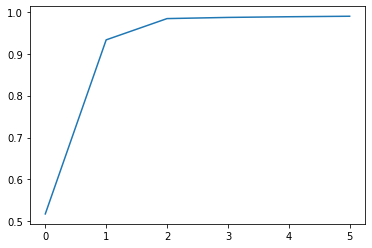

In [64]:
import matplotlib.pyplot as plt
plt.plot(range(len(scores)), scores)

In [65]:
# Remove features based on recursive feature elimination
from sklearn.feature_selection import RFE

model = linear_model.LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=3)

X = data_regression.drop(columns=["target"])
y = data_regression["target"]
rfe.fit(X, y)

X_transformed = rfe.transform(X)
pd.DataFrame(X_transformed)

,0,1,2
0,-0.586801,0.465974,0.813592
1,-0.408772,0.455172,-0.261419
2,0.390684,-0.505381,0.520989
3,-0.214804,-0.667329,-1.728532
4,0.831726,-0.413640,0.897969
...,...,...,...
95,-0.874916,1.214003,0.518090
96,-1.322689,-0.059852,-1.775261
97,0.591459,-0.321086,-1.711333
98,-2.020943,-1.254103,-1.736937


In [66]:
data_regression

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,target
0,1.090864,-0.586801,0.555447,0.465974,0.813592,0.366557,0.313489,-0.899178,0.847867,0.741493,205.438750
1,-0.027555,-0.408772,0.681695,0.455172,-0.261419,-0.501390,1.327225,-1.105535,0.494918,-0.032263,1.703838
2,-0.816345,0.390684,-0.577678,-0.505381,0.520989,1.198496,0.181723,-1.565063,1.392801,1.026260,147.911422
3,0.668999,-0.214804,-1.980735,-0.667329,-1.728532,0.423599,1.648247,-0.961389,0.341991,0.141865,-296.588997
4,0.421216,0.831726,-1.148323,-0.413640,0.897969,-0.145185,-0.305138,0.113709,-0.433110,1.599492,145.063316
...,...,...,...,...,...,...,...,...,...,...,...
95,0.719217,-0.874916,-0.355740,1.214003,0.518090,-0.110975,-1.508058,-1.333057,1.382179,-0.133122,95.178234
96,0.646222,-1.322689,1.582885,-0.059852,-1.775261,-1.545810,0.641493,1.293571,-0.558254,1.638972,-128.595339
97,1.122763,0.591459,0.440451,-0.321086,-1.711333,0.447481,-1.264206,-1.617742,0.046017,0.200553,-137.295656
98,0.267360,-2.020943,-1.967297,-1.254103,-1.736937,0.284199,0.064321,-0.671280,-0.178271,0.302872,-584.592935


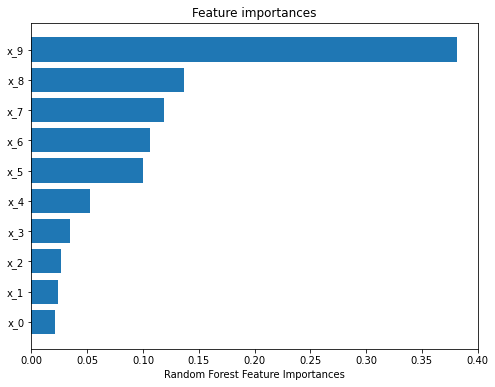

In [67]:
# Remove features based on the feature importance
from sklearn import ensemble

model = ensemble.RandomForestRegressor()
model.fit(X,y)
importances = model.feature_importances_
idx = np.argsort(importances)
plt.figure(figsize=(8,6))
plt.title("Feature importances")
plt.barh(range(len(idx)), importances[idx], align="center")
plt.yticks(range(len(idx)), [data_regression.columns[col] for col in range(len(idx))])
plt.xlabel("Random Forest Feature Importances")
plt.show()

In [68]:
# Select features using SelectFromModel class
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(estimator=model, max_features=3)
X_transformed = sfm.fit_transform(X,y)
support = sfm.get_support()
data_regression.drop(columns=["target"]).loc[:, support]

,x_3,x_4,x_8
0,0.465974,0.813592,0.847867
1,0.455172,-0.261419,0.494918
2,-0.505381,0.520989,1.392801
3,-0.667329,-1.728532,0.341991
4,-0.413640,0.897969,-0.433110
...,...,...,...
95,1.214003,0.518090,1.382179
96,-0.059852,-1.775261,-0.558254
97,-0.321086,-1.711333,0.046017
98,-1.254103,-1.736937,-0.178271


In [69]:
X_transformed

array([[ 0.4659745 ,  0.81359173,  0.8478674 ],
       [ 0.45517184, -0.26141913,  0.49491758],
       [-0.50538127,  0.52098859,  1.39280095],
       [-0.66732875, -1.72853187,  0.34199136],
       [-0.4136395 ,  0.89796858, -0.43311025],
       [ 0.61828869,  0.81976044, -2.15914345],
       [ 0.30205092, -0.71118007,  0.15308873],
       [-0.68259601, -0.61947516, -0.14314305],
       [ 0.47729329,  1.87945715,  1.02264877],
       [-1.34187835, -0.63148694,  0.38336486],
       [-0.06472358, -0.58272728,  0.42515754],
       [-0.81254987, -1.97176257, -0.45733026],
       [-0.61589749,  0.35536911,  0.28742877],
       [ 0.38874358, -0.08686084, -1.13259531],
       [-0.01184854,  0.3021329 , -0.19794595],
       [-0.04398728,  0.88021037, -0.63746268],
       [ 0.10764266, -0.63422711,  0.64975395],
       [-1.17518522,  1.19116063, -0.09739738],
       [-0.13833177,  0.80323821, -0.21980983],
       [-0.17937487,  0.64891122,  2.04869706],
       [-0.55586272,  0.19351453,  0.593